In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [15]:
data = np.load('WGAN_training_metrics_compressed.npz')
crit_loss_avg = data['crit_loss_avg']
gen_loss_avg = data['gen_loss_avg']
baseline = data['baseline']
performance_metric = data['performance_metric']
X_test_truth = data['X_test_truth']
Y_test = data['Y_test']
substructure_variables = ['w', 'q', 'm', 'r', 'tau1s', 'tau2s']
n_epochs = 30


In [16]:
pd.set_option('display.float_format', '{:.3f}'.format)
#baseline_df = pd.DataFrame([baseline], columns=substructure_variables, index=['Baseline'])
performance_df = pd.DataFrame(performance_metric, columns=substructure_variables, index=pd.Index(range(1, n_epochs+1), name='Epoch'))
df = performance_df#pd.concat([baseline_df, performance_df])
df['Total'] = df.sum(axis=1)
df['GenLoss'] = gen_loss_avg
df['CritLoss'] = crit_loss_avg
max_threshold = 1e3
#f = df.map(lambda x: np.nan if abs(x) > max_threshold else x)

In [17]:
selected_epochs = list(range(900, 1001, 10))
display_df = df#.loc[selected_epochs]

In [18]:
display_df

,w,q,m,r,tau1s,tau2s,Total,GenLoss,CritLoss
Epoch,,,,,,,,,
1,0.265,0.264,0.389,0.706,0.265,0.198,2.088,2010.578,6.926
2,0.260,0.265,0.390,0.708,0.260,0.195,2.079,2178.778,3.349
3,0.285,0.261,0.398,0.697,0.285,0.214,2.140,2056.276,2.431
4,0.281,0.261,0.398,0.699,0.281,0.210,2.129,1809.405,2.118
5,0.310,0.255,0.407,0.686,0.310,0.237,2.206,1663.144,1.949
6,0.297,0.258,0.403,0.691,0.297,0.224,2.171,1610.000,1.847
7,0.263,0.266,0.390,0.705,0.263,0.196,2.085,1593.113,1.769
8,0.248,0.267,0.384,0.712,0.248,0.186,2.046,1572.715,1.708
9,0.237,0.268,0.380,0.717,0.237,0.179,2.019,1651.735,1.652


In [19]:
df[df.Total == df.Total.min()]

,w,q,m,r,tau1s,tau2s,Total,GenLoss,CritLoss
Epoch,,,,,,,,,
9,0.237,0.268,0.380,0.717,0.237,0.179,2.019,1651.735,1.652


In [20]:
df[df.GenLoss == df.GenLoss.min()]

,w,q,m,r,tau1s,tau2s,Total,GenLoss,CritLoss
Epoch,,,,,,,,,
30,0.316,0.248,0.409,0.683,0.316,0.243,2.215,1488.011,0.891


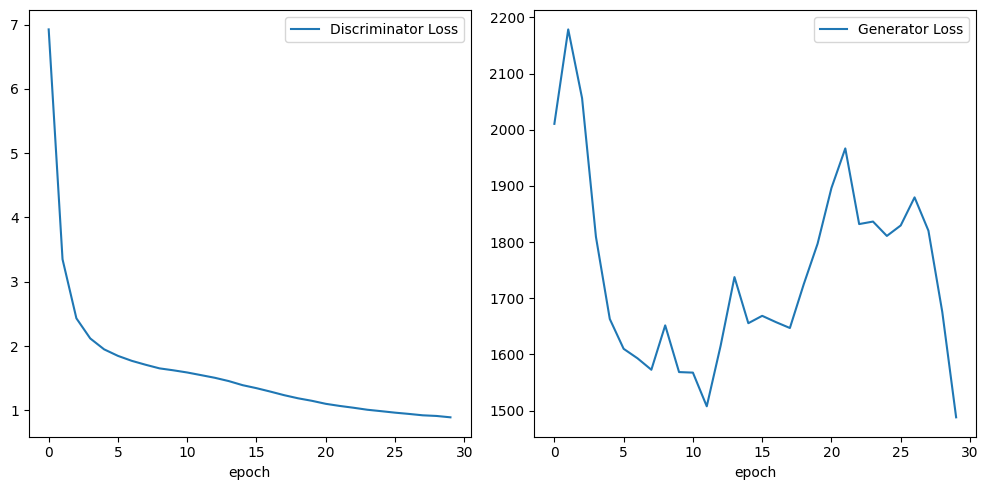

In [21]:
plt.figure(figsize=(10, 5))

# Discriminator Loss
plt.subplot(1, 2, 1)
plt.plot(crit_loss_avg, label='Discriminator Loss')
plt.xlabel('epoch')
plt.legend()

# Generator Loss
plt.subplot(1, 2, 2)
plt.plot(gen_loss_avg, label='Generator Loss')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
gen_model_width = 150
gen_model_depth = 8
dropout_rate = 0.2
kernel_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.2)

# Generator model
def build_generator(input_shape):
    gen_input = tf.keras.layers.Input(shape=(input_shape,))
    x = gen_input
        
    for _ in range(gen_model_depth):
        x = tf.keras.layers.Dense(gen_model_width, use_bias=False, kernel_initializer=kernel_init if _ == 0 else None)(x)
        x = tf.keras.layers.LeakyReLU(negative_slope=0.2)(x)
        x = tf.keras.layers.LayerNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)

    outputs = tf.keras.layers.Dense(1, use_bias=False, activation='relu')(x)

    return tf.keras.models.Model(inputs=gen_input, outputs=outputs)

model_generator = build_generator(X_test_truth.shape[1])

In [26]:
model_generator.load_weights('InfiniteUnfolding/model_checkpoints/generator_epoch-0030.weights.h5')

In [27]:
weights = model_generator.predict(X_test_truth[Y_test==0], verbose=0).flatten()

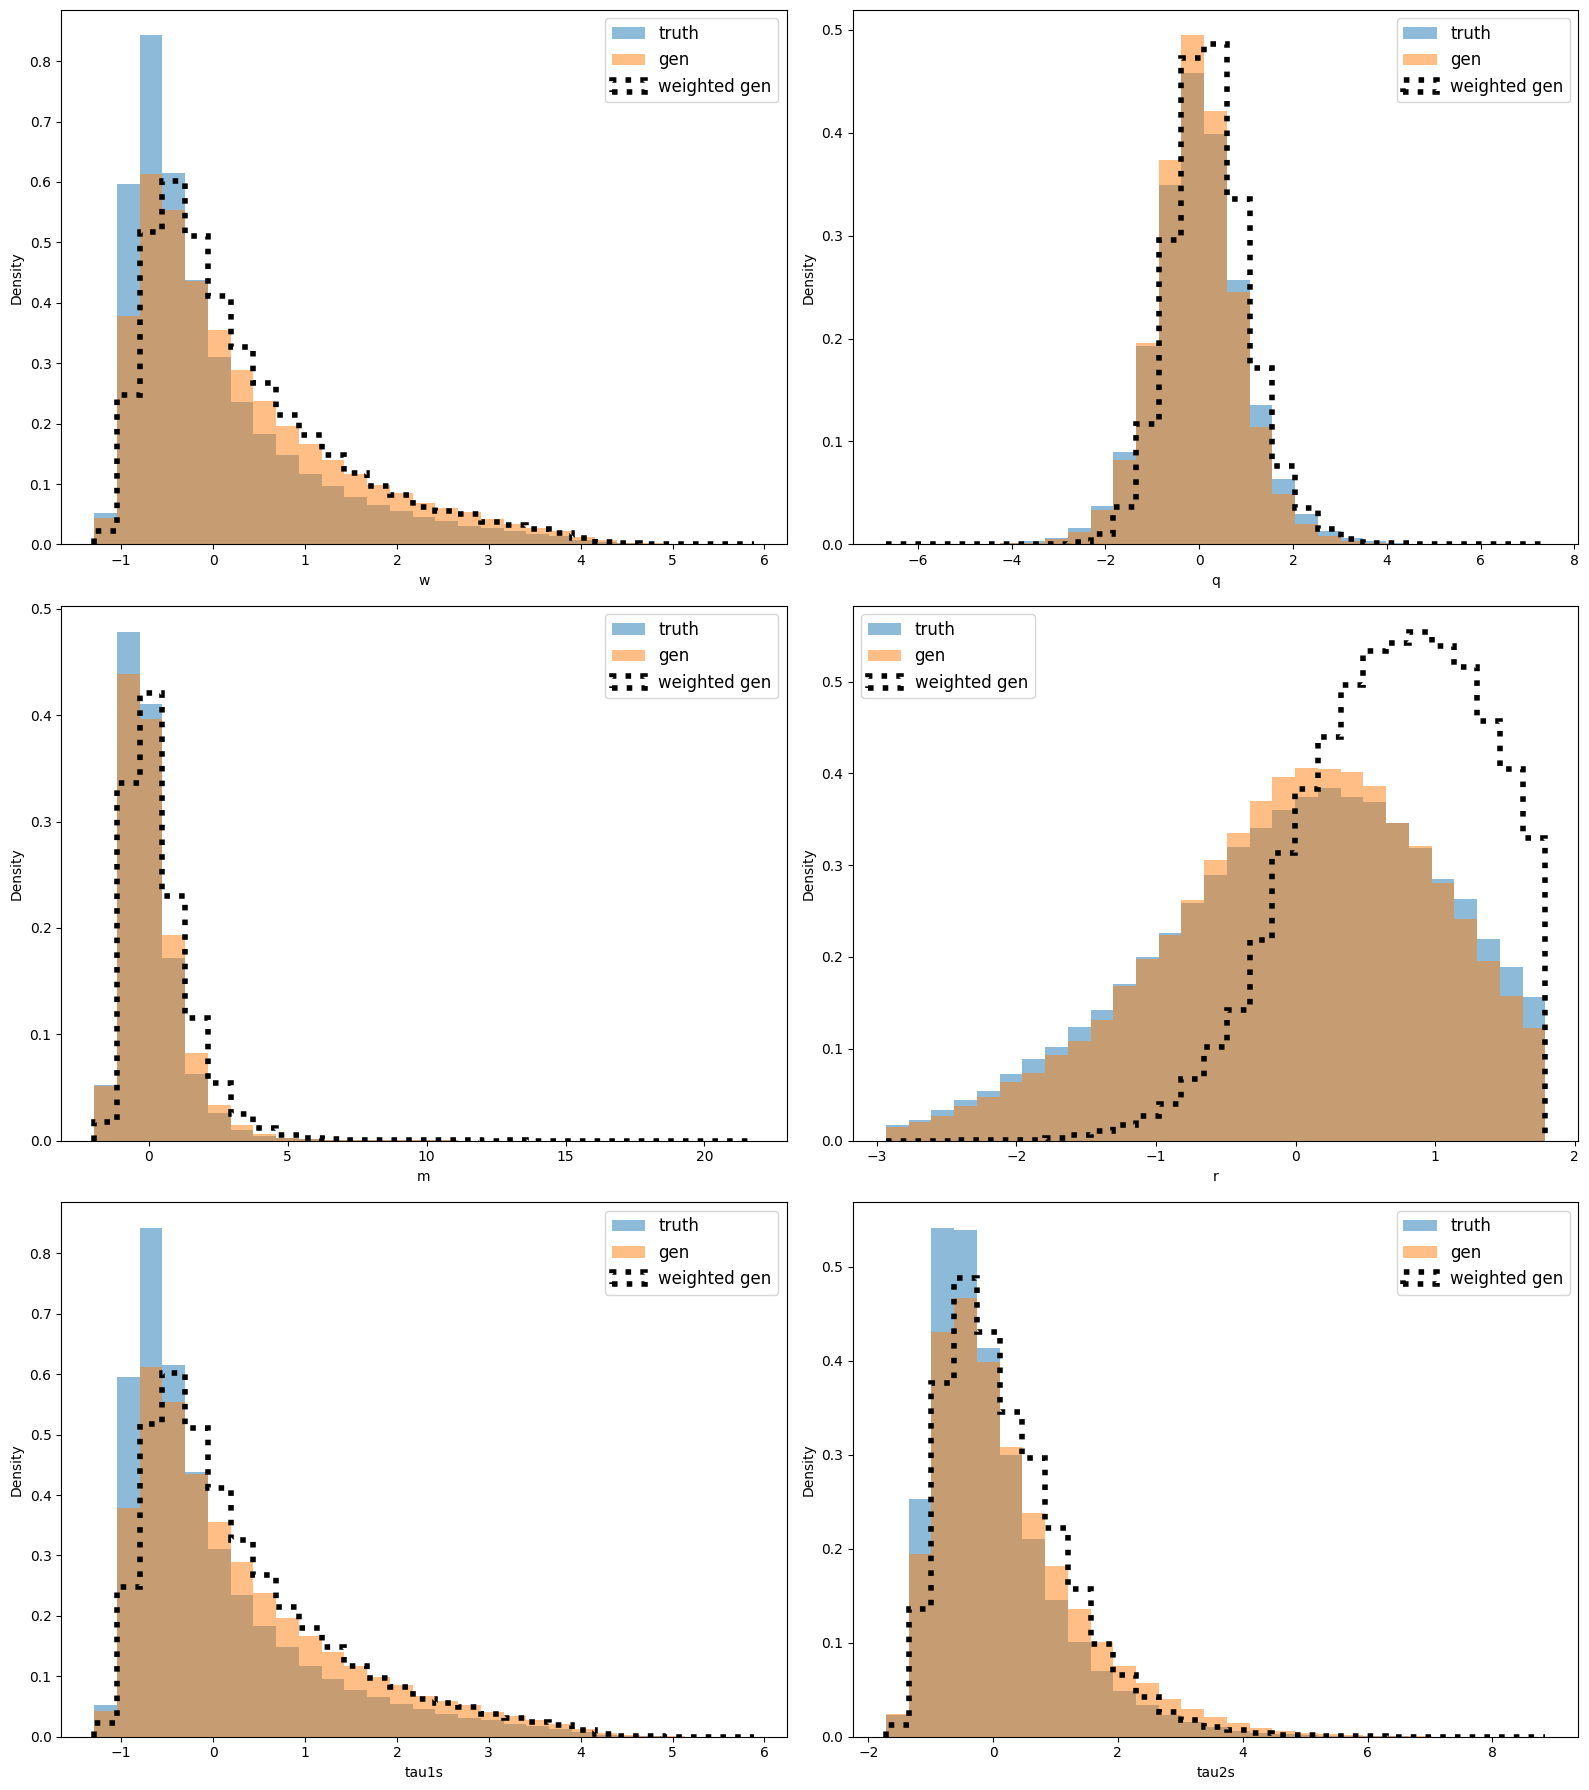

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()
nbins = 30
density = True

for i, var_name in enumerate(substructure_variables):
    X = X_test_truth[:, i]
    bins = np.linspace(X.min(), X.max(), nbins)
    
    axs[i].hist(X[Y_test == 1], bins=bins, alpha=0.5, label="truth", density=density, zorder=-1)
    axs[i].hist(X[Y_test == 0], bins=bins, alpha=0.5, label="gen", density=density, zorder=0)
    axs[i].hist(X[Y_test == 0], bins=bins, weights=weights,
                histtype="step", color="black", ls=":", lw=4, label="weighted gen", density=density, zorder=1)
    
    axs[i].legend(fontsize=12)
    axs[i].set_ylabel("Density")
    axs[i].set_xlabel(var_name)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
